# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and **distinguish** between the ten **handwritten digits** (0-9).

The **MNIST dataset** comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradations of the gray scale, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
print('Libraries imported')
seed = 0 # fix random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)

Libraries imported


#### Step 1: Load and Process the Data

Keras can conveniently **download** the MNIST data from the web. All we need to do is **import** the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has **pre-defined test and training sets**, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to **format** it in the correct shape.

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


#### Example: to_categorical

**Converts** a class vector (integers) **to binary** class matrix. E.g. for use with categorical_crossentropy.

In [3]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

#### Reshape data and convert labels to be used with categorical cross entropy

> `reshape(X_train.shape[0], img_rows * img_cols) `

reshapes the `X_train` array to have the shape (number of samples, number of features), so that each image is **flattened** into a single row of 28x28=784 features.

After reshaping:
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Before conversion to float:
uint8
After conversion to float:
float32
an example of a data point with label 4, i.e.  4


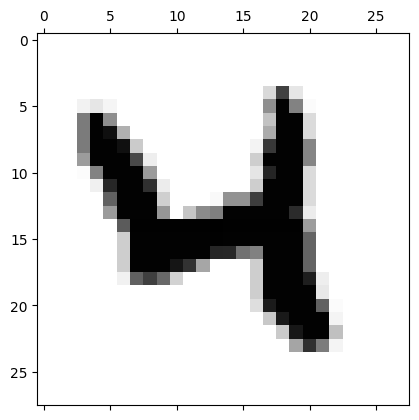

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
'''
> X_train.shape[0]                                represents the number of samples (images) in the training set.
> reshape(X_train.shape[0], img_rows * img_cols)  reshapes the X_train array to have the shape (number of samples, number of features), so that each image is flattened into a single row of 784 features.
So, if you have 60,000 images, the reshaped array would have the shape (60000, 784).
'''
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('After reshaping:')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
print('Before conversion to float:')
print(X_train.dtype)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('After conversion to float:')
print(X_train.dtype)

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label 4, i.e. ', Y_train[20])
# matshow: display a matrix in a new figure window
'''select the 21st sample from X_train: 20 index specifies the sample and the : indicates that all features (pixels) of that sample are selected;
reshape the selected sample back into its original 2D form of a 28x28 image;
set the colormap to 'binary', which displays the image in black (0) and white (1) '''
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#### Step 2: Define the Neural Net and its Architecture

We can now move on to **construct** our **deep neural net**. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one using the `add()` method.

For the purposes of our example, it suffices to focus on `Dense` **layers for simplicity**. Every `Dense()` layer accepts as its first required argument an integer which specifies the **number of neurons**. The **type of activation function** for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`.

In order for our DNN to work properly, we have to **make sure that the numbers of input and output neurons for each layer match**. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the [softmax](https://it.wikipedia.org/wiki/Funzione_softmax) output layer to match the number of categories.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

Next, we **choose the loss function** according to which to train the DNN. For **classification problems**, this is the **cross entropy**, and since the output data was cast in **categorical form**, we choose the [`categorical_crossentropy`](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function.

To **optimize the weights** of the net, we choose [SGD](https://keras.io/api/optimizers/sgd/). This algorithm is already available to use under Keras' `optimizers` module, but we could use any other built-in one as well. The **parameters for the optimizer**, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function. All available arguments can be found in Keras' online documentation at [https://keras.io/](https://keras.io/).

While the loss function and the optimizer are essential for the training procedure, to **test** the performance of the model one may want to look at a **particular** `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points.

To **complete the definition** of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 4: Train the model

We train our DNN **in minibatches**.

**Shuffling** the training data during training **improves stability** of the model. Thus, we train over a number of training epochs. Each **epoch** corresponds to using **all the train data** divided in minibatches.

**Training** the DNN is a one-liner using the `fit()` **method** of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or `validation_data`. To **monitor the training procedure** for every epoch, we set `verbose=True`.

In [7]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7698 - acc: 0.7752 - val_loss: 0.3220 - val_acc: 0.9080
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3935 - acc: 0.8880 - val_loss: 0.2467 - val_acc: 0.9293
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3133 - acc: 0.9122 - val_loss: 0.2056 - val_acc: 0.9386
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2705 - acc: 0.9243 - val_loss: 0.1790 - val_acc: 0.9460
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2375 - acc: 0.9329 - val_loss: 0.1612 - val_acc: 0.9507
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2111 - acc: 0.9401 - val_loss: 0.1440 - val_acc: 0.9557
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1890 - acc: 0.9467 - val_loss: 0.1312 - val_acc: 0.9598
Epoch 8/20
1875/1875 [==============================] - 7s 

#### Step 5: Evaluate the Model Performance on the Unseen Test Data

Next, we **evaluate the model** and read of the loss on the test data, and its accuracy using the `evaluate()` method.

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - acc: 0.9770

Test loss: 0.07410825788974762
Test accuracy: 0.9769999980926514


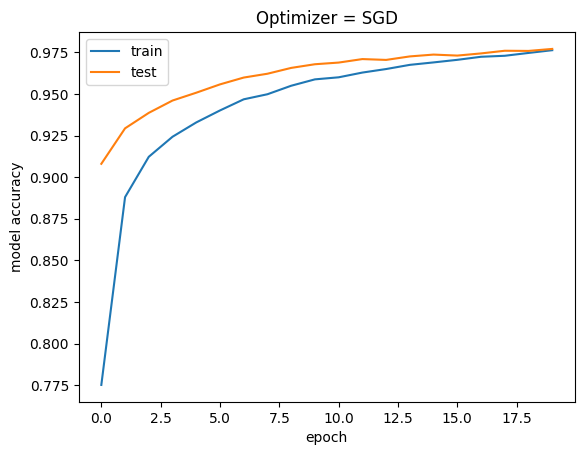

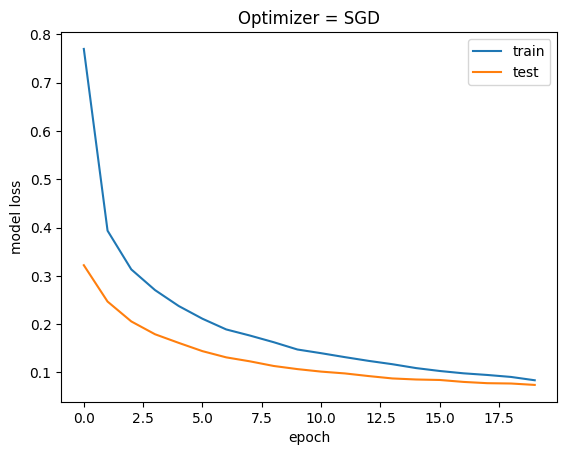

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.title('Optimizer = SGD')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.title('Optimizer = SGD')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Dropout, **during training**, **slices off some artificial neurons**, thus, training accuracy suffers.

Dropout, **during testing**, turns itself **off** and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, **testing accuracy improves** with respect to training accuracy.

Put differently, during training, if dropout is enabled, some neurons are excluded, so the DNN has to learn with fewer neurons at disposal, promoting robustness and **reducing overfitting**. This may cause training accuracy to be lower. However, when Dropout is turned off during testing, the network performs better because it can use all its neurons, potentially leading to higher testing accuracy compared to training accuracy.

313/313 [==============================] - 1s 2ms/step


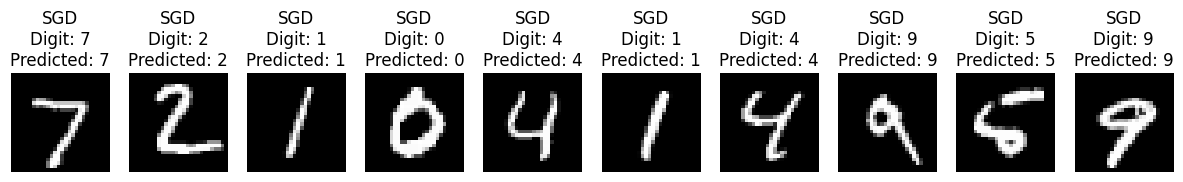

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("SGD\nDigit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

_______________
_______________
### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the **number of epochs** to an adeuqate value</span>. Try to use at least **two other optimizers**, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.
______________



The network was tested out keeping dropout enabled and fixing the number of epochs to 20, in order to compare the performances of different optimizers. The images below are obtained by changing the parameters above and saving the `.png` images.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


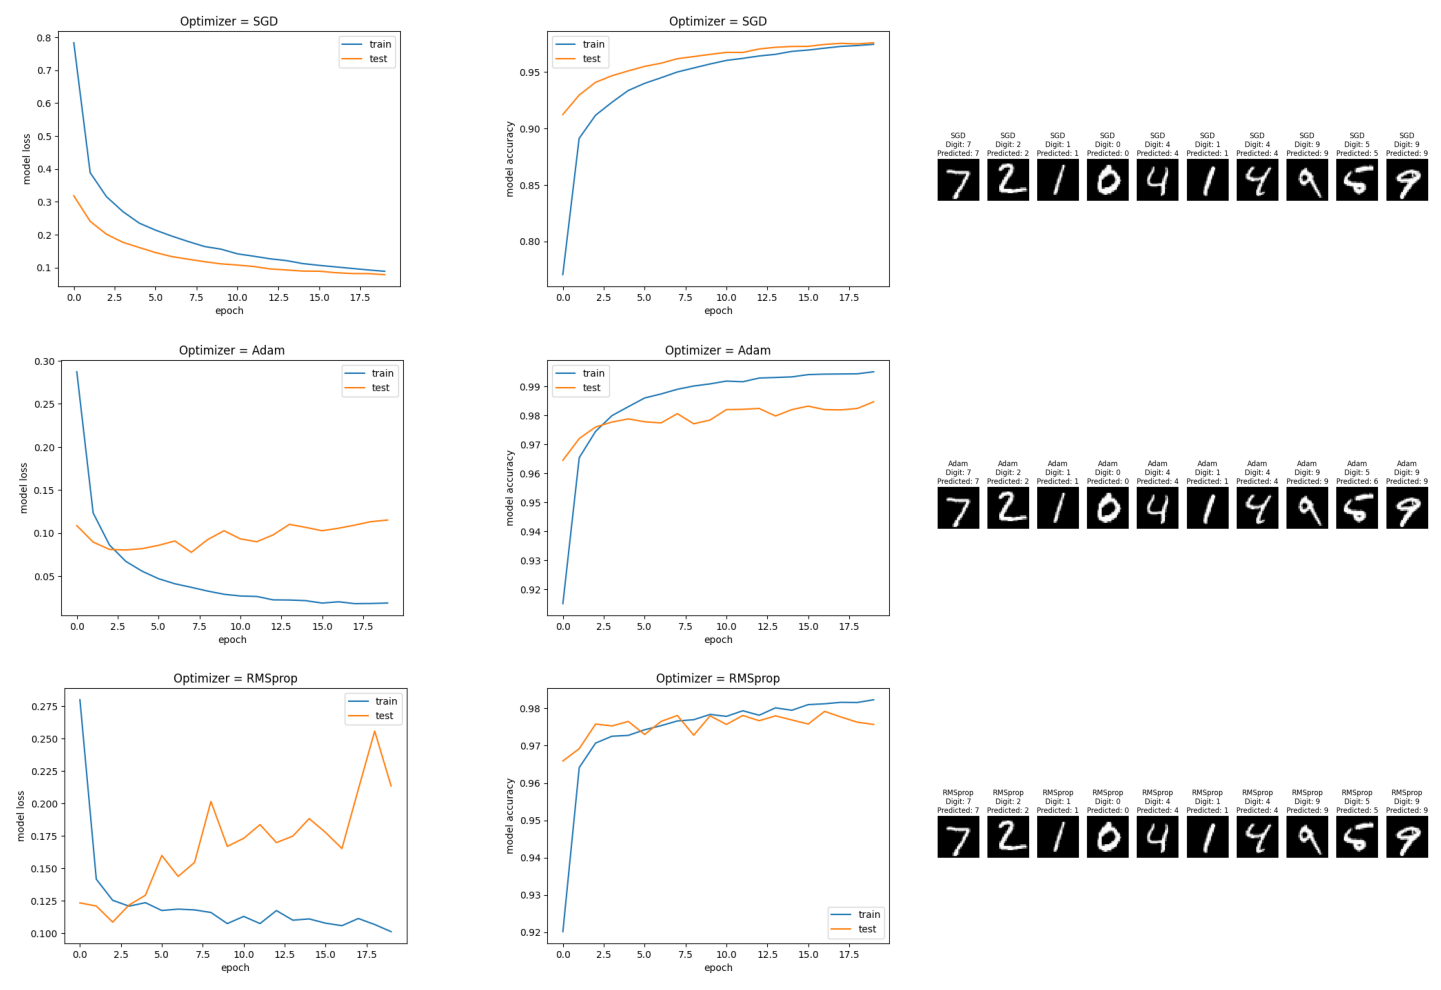

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the list of optimizers and image types
optimizers = ['SGD', 'Adam', 'RMSprop']
image_types = ['loss', 'acc', 'predict']

# Path to the directory containing images in Google Drive
drive_path = '/content/drive/My Drive/Colab Notebooks/'

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(optimizers), len(image_types), figsize=(15, 10))

# Loop over the optimizers and image types to load and display each image
for i, optimizer in enumerate(optimizers):
    for j, img_type in enumerate(image_types):
        # Construct the filename
        filename = f'{optimizer}_{img_type}.png'
        # Full path to the image
        full_path = os.path.join(drive_path, filename)
        # Load the image
        img = mpimg.imread(full_path)
        # Display the image
        axes[i, j].imshow(img)
        axes[i, j].axis('off')  # Hide the axis

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

#### [SGD](https://keras.io/api/optimizers/sgd/)
shows the least erratic change in loss and accuracy.

#### [Adam](https://keras.io/api/optimizers/adam/)
converges faster, so, it would be maybe better to stop the training earlier, so that the gap between training and testing accuracy shrinks.

#### [RMSprop](https://keras.io/api/optimizers/rmsprop/)
is more irregular than Adam and SGD, but in the end the overall accuracy is comparable to Adam.

_________________
_________________
#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are **local spatial correlations** between the pixels, but also **translational invariance**, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows:

In [11]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

_________________
_________________
### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import SGD

def create_CNN(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second Convolutional Layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third Convolutional Layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten the output before feeding into dense layers
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout to prevent overfitting

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])

    return model

# Example usage:
input_shape = (28, 28, 1)  # Adjust this based on your image dimensions
num_classes = 10  # For digit classification (0-9)

model_CNN = create_CNN(input_shape, num_classes)
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)         

**Train** your DCNN and **evaluate its performance** proceeding exactly as before:

In [17]:
batch_size = 32
epochs = 20  # You can adjust the number of epochs as needed

# Define input shape and number of classes
input_shape = X_train.shape[1:]
num_classes = 10  # Assuming you have 10 classes for classification

# Create the CNN model
model_CNN = create_CNN(input_shape, num_classes)

# Train the CNN
history = model_CNN.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_test, Y_test))

# Evaluate the model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
1875/1875 [==============================] - 66s 35ms/step - loss: 1.5831 - accuracy: 0.4484 - val_loss: 0.4429 - val_accuracy: 0.8807
Epoch 2/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.5148 - accuracy: 0.8385 - val_loss: 0.1994 - val_accuracy: 0.9359
Epoch 3/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3444 - accuracy: 0.8954 - val_loss: 0.1417 - val_accuracy: 0.9573
Epoch 4/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2773 - accuracy: 0.9152 - val_loss: 0.1210 - val_accuracy: 0.9609
Epoch 5/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2397 - accuracy: 0.9279 - val_loss: 0.1015 - val_accuracy: 0.9685
Epoch 6/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2133 - accuracy: 0.9360 - val_loss: 0.0944 - val_accuracy: 0.9701
Epoch 7/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1910 - accuracy: 0.9425 - val_loss: 0.0830 -

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.

313/313 [==============================] - 2s 7ms/step - loss: 0.0493 - accuracy: 0.9834

Test loss: 0.049297869205474854
Test accuracy: 0.9833999872207642


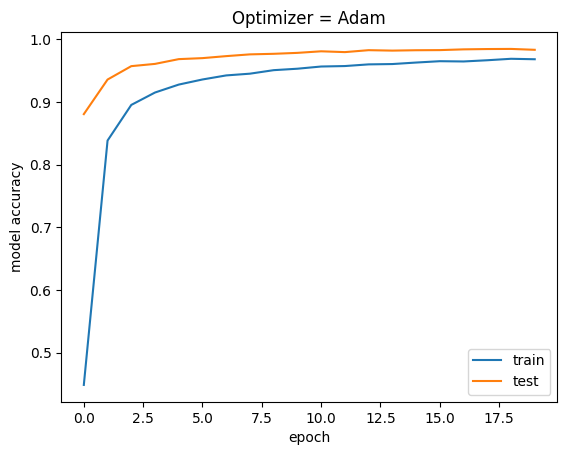

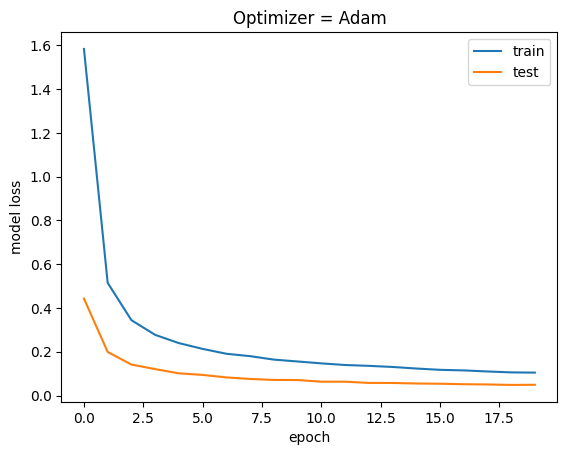

In [18]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.title('Optimizer = SGD')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.title('Optimizer = SGD')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 2s 7ms/step


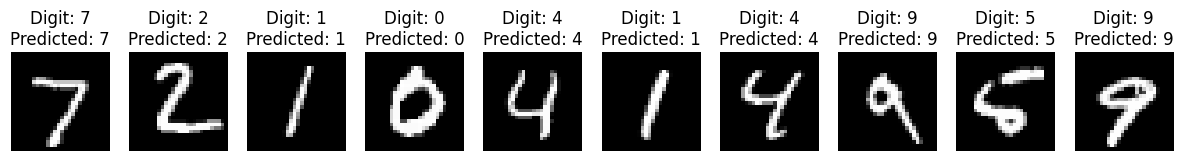

In [19]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

_________________
_________________
### Exercise 12.3

Use the `gimp` application to **create 10 pictures** of your **"handwritten"** digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow))

In [20]:
# UNCOMMENT TO LOAD FILES ON GOOGLE COLAB
#from google.colab import files
#upload = files.upload() #this will let you browse and choose the file to be uploaded
# HERE WE USE DRIVE TO ACCESS THE PICTURES FROM ANYWHERE
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')
drive_path = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image size: 28x28


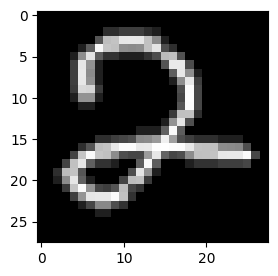

(28, 28)


In [21]:
from PIL import Image
import os

# Construct the filename
filename = f'2.png'
# Full path to the image
full_path = os.path.join(drive_path, filename)

digit_filename = filename
digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(3,3))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(1, 28, 28, 1)
1/1 [==============================] - 0s 32ms/step


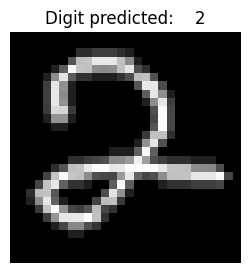

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming xdim and ydim are the dimensions of the input images (e.g., 28x28)
# Assuming data is the input image data

# Reshape the data to match the input shape of the model
data = data.reshape(1, xdim, ydim, 1)
print(data.shape)

# Make predictions using the model
pred_0 = model_CNN.predict(data)

# Reshape the data back to its original shape
data = data.reshape(xdim, ydim)

# Display the digit and the predicted label
plt.figure(figsize=(3, 3))
plt.imshow(data, cmap='gray')
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()


Image size: 28x28


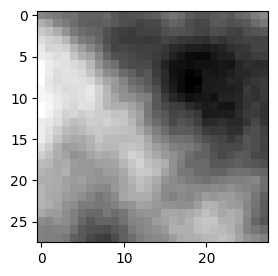

(28, 28)


In [23]:
from PIL import Image
import os

digit_filename = "./pure_noise.png"
full_path = os.path.join(drive_path, digit_filename)
digit_in = Image.open(full_path).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(3,3))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

I use the previously trained DNN to predict the digit:

(1, 28, 28, 1)
1/1 [==============================] - 0s 20ms/step


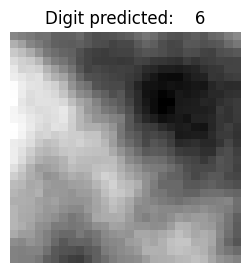

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming xdim and ydim are the dimensions of the input images (e.g., 28x28)
# Assuming data is the input image data

# Reshape the data to match the input shape of the model
data = data.reshape(1, xdim, ydim, 1)
print(data.shape)

# Make predictions using the model
pred_0 = model_CNN.predict(data)

# Reshape the data back to its original shape
data = data.reshape(xdim, ydim)

# Display the digit and the predicted label
plt.figure(figsize=(3, 3))
plt.imshow(data, cmap='gray')
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()


Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 18ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 18ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 27ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 18ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 20ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step
Image size: 28x28
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step


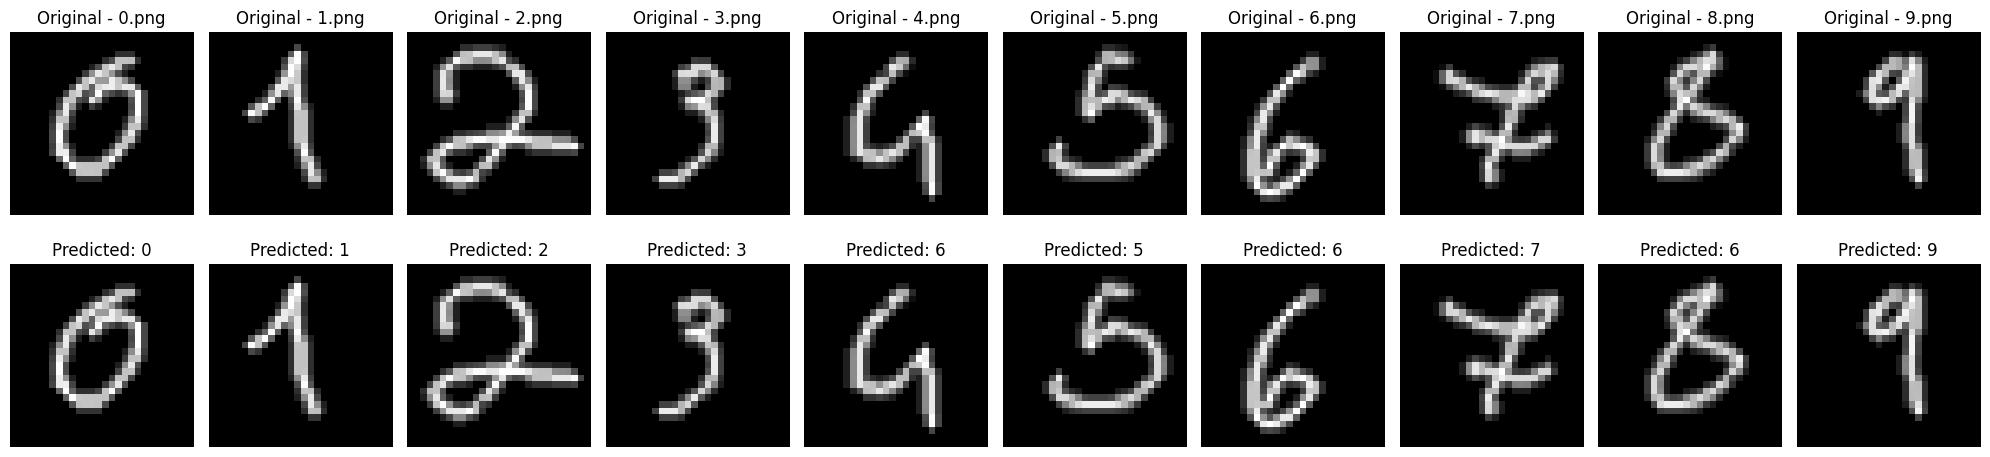

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing the digit images

# Initialize lists to store images and predictions
images = []
predictions = []

# Loop through each digit file from 0.png to 9.png
for digit in range(10):
    full_path = os.path.join(drive_path, f"{digit}.png")

    # Load and preprocess the image
    digit_in = Image.open(full_path).convert('L')
    data = np.array(digit_in) / 255.0

    # Print the size of the image
    xdim, ydim = data.shape
    print(f"Image size: {xdim}x{ydim}")

    # Store the original image
    images.append(data)

    # Reshape data for prediction
    data_reshaped = data.reshape(1, xdim, ydim, 1)  # Assuming the model expects input shape (batch_size, height, width, channels)
    print(data_reshaped.shape)

    # Predict the digit
    pred_0 = model_CNN.predict(data_reshaped)
    predictions.append(np.argmax(pred_0))

# Display the original images in the first row
plt.figure(figsize=(20, 5))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Original - {i}.png")
    plt.axis('off')

# Display the images with predicted labels in the second row
for i in range(10):
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Predicted: {predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

_________________
_________________
### <span style="color:green">Supplementary information 1: Use of `gimp` </span>

- from the Unix shell type: `gimp` and hit `Return`
- File -> new (chose: 28x28 pixels)
- rascale the image to 800%
- Use the **brush** with dimension 2px to draw your digit
- Color -> invert (to have black background)
- Export the image as a `.png` file

That's all!

### <span style="color:green">Supplementary information 2: Display trained filters in your CNN</span>

Print your NN layers:

In [26]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d_9
1 max_pooling2d_9
2 dropout_13
3 conv2d_10
4 max_pooling2d_10
5 dropout_14
6 conv2d_11
7 max_pooling2d_11
8 dropout_15
9 flatten_3
10 dense_9
11 dropout_16
12 dense_10


Display your filters:

(3, 3, 1, 32)


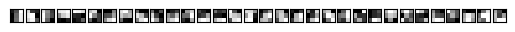

In [27]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

### <span style="color:green">Supplementary information 3: Monitor layer outputs in your CNN</span>

In [28]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))

def display_activation(activations, col_size, row_size, layer_index):
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

1/1 [==============================] - 0s 110ms/step


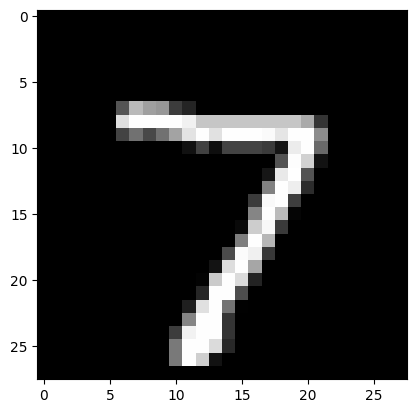

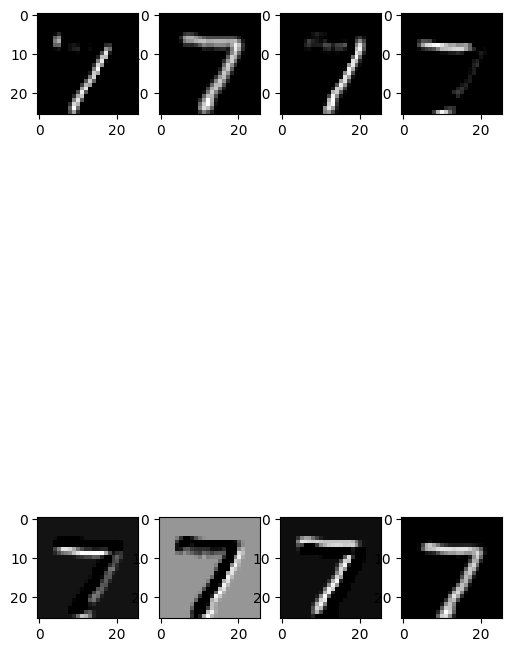

In [29]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 4, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer